<a href="https://colab.research.google.com/github/Sahanaka/feature-selection-demo/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection**
In this notebook, we will explore feature selection. In many cases, all the features in a dataset may not do much or might harm our models' performance. Hence it's important to find the best set of features that best represent the relationship (X => Y). We will use the [Breast Cancer dataset](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) to explore feature selection. 

## **Imports**

In [39]:
import pandas as pd
import numpy as np

# Scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## **Load the dataset**

In [40]:
df = pd.read_csv('breast_cancer_data.csv')

In [41]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [42]:
# Data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [43]:
# Shape
df.shape

(569, 33)

In [44]:
# Describe
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


## **Remove Unwanted Features**

In [45]:
# Finding null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [46]:
# Drop 'id' & 'unnamed' column
cols_to_remove = ['id', 'Unnamed: 32']
df.drop(columns=cols_to_remove, axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Integer Encode the diagnosis
The diagnosis column has character labels. But we need to have them in numerical format to feed into our models. 

In [47]:
df['diagnosis'] = (df["diagnosis"] == 'M').astype('int')

In [48]:
df.tail(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
544,0,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,0.1620,0.06688,0.2720,1.047,2.0760,23.120,0.006298,0.021720,0.026150,0.009061,0.01490,0.003599,15.050,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492
545,0,13.620,23.23,87.19,573.2,0.09246,0.06747,0.029740,0.024430,0.1664,0.05801,0.3460,1.336,2.0660,31.240,0.005868,0.020990,0.020210,0.009064,0.02087,0.002583,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
546,0,10.320,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,0.2104,0.967,1.3560,12.970,0.007086,0.007247,0.010120,0.005495,0.01560,0.002606,11.250,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
547,0,10.260,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.024380,0.1669,0.06714,0.1144,1.023,0.9887,7.326,0.010270,0.030840,0.026130,0.010970,0.02277,0.005890,10.830,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479
548,0,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,0.1580,0.06235,0.2957,1.363,2.0540,18.240,0.007440,0.011230,0.023370,0.009615,0.02203,0.004154,10.930,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920
549,0,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,0.06328,0.5196,1.918,3.5640,33.000,0.008263,0.018700,0.012770,0.005917,0.02466,0.002977,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
550,0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,0.3163,1.304,2.1150,20.670,0.009579,0.011040,0.000000,0.000000,0.03004,0.002228,11.660,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
551,0,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.022570,0.2030,0.06552,0.2800,1.467,1.9940,17.850,0.003495,0.030510,0.034450,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,0.2409,1.367,1.4770,18.760,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
553,0,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,0.3013,1.879,2.1210,17.860,0.010940,0.018340,0.039960,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393


## **Modeling**
We will fit the data on a RandomForestClassifier and calculate various performances metrices.

In [49]:
X = df.drop('diagnosis', 1)
y = df['diagnosis']

In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [51]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Fit and Compute Metrices

In [52]:
def fit_model(X, y):
  model = RandomForestClassifier(criterion='entropy', random_state=47)
  model.fit(X, y)
  return model

In [62]:
def calculate_metrics(model, X_test_scaled, Y_test):
  # Get model predictions
  y_predict_r = model.predict(X_test_scaled)
  
  # Calculate evaluation metrics for assesing performance of the model.
  roc = roc_auc_score(Y_test, y_predict_r)
  acc = accuracy_score(Y_test, y_predict_r)
  prec = precision_score(Y_test, y_predict_r)
  rec = recall_score(Y_test, y_predict_r)
  f1 = f1_score(Y_test, y_predict_r)
    
  return acc, roc, prec, rec, f1

In [58]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. We normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    roc, acc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [59]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

### Train the model with all features

In [63]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30


## **Correlation Matrix**
We can find the correlation between features and drop those with high correlation. 

In [64]:
# Calculate correlation
cor = df.corr()

<Figure size 1440x1440 with 0 Axes>

In [66]:
type(cor)

pandas.core.frame.DataFrame

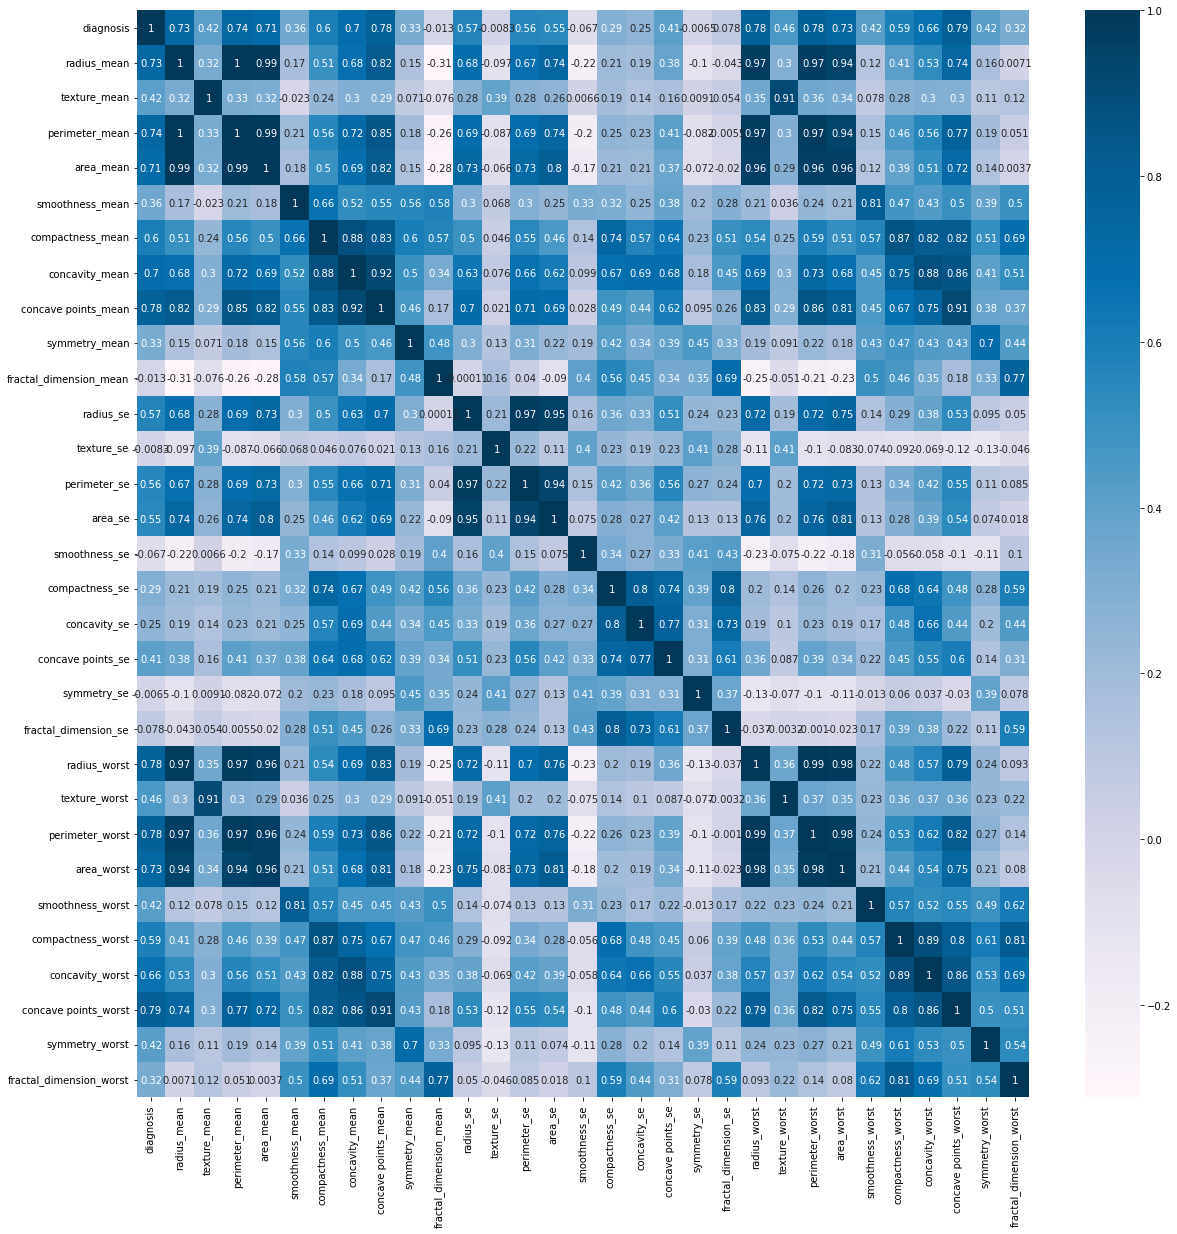

In [68]:
# Plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

## **Filter Method**
This type of feature selection uses statistical methods to rank a given set of features. Moreover, it does this ranking regardless of the model we will be training on (i.e. we only need the feature values). When using these, it is important to note the types of features and target variable we have. Here are a few examples:

* Pearson Correlation (numeric features - numeric target, *exception: when target is 0/1 coded*)
* ANOVA f-test (numeric features - categorical target)
* Chi-squared (categorical features - categorical target)


### Correlation with the target variable

In [69]:
# Abs of correlation
cor_target = abs(cor['diagnosis'])
cor_target

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean     0.012838
radius_se                  0.567134
texture_se                 0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se              0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se                0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

Now we can filter out features given a certain threshold.

In [73]:
THRESHOLD = 0.2
relevant_features = cor_target[cor_target > THRESHOLD]
relevant_features

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
Name: diagnosis, dtype: float64

In [75]:
# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Now let's evalute our model on the new set of features.

In [76]:
strong_features_eval_df = evaluate_model_on_features(df[names], y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.97619,0.964706,25


### Correlation with other variables.
Now we can drop features that are highly correlated. This will reduce the redundancy of our dataset.

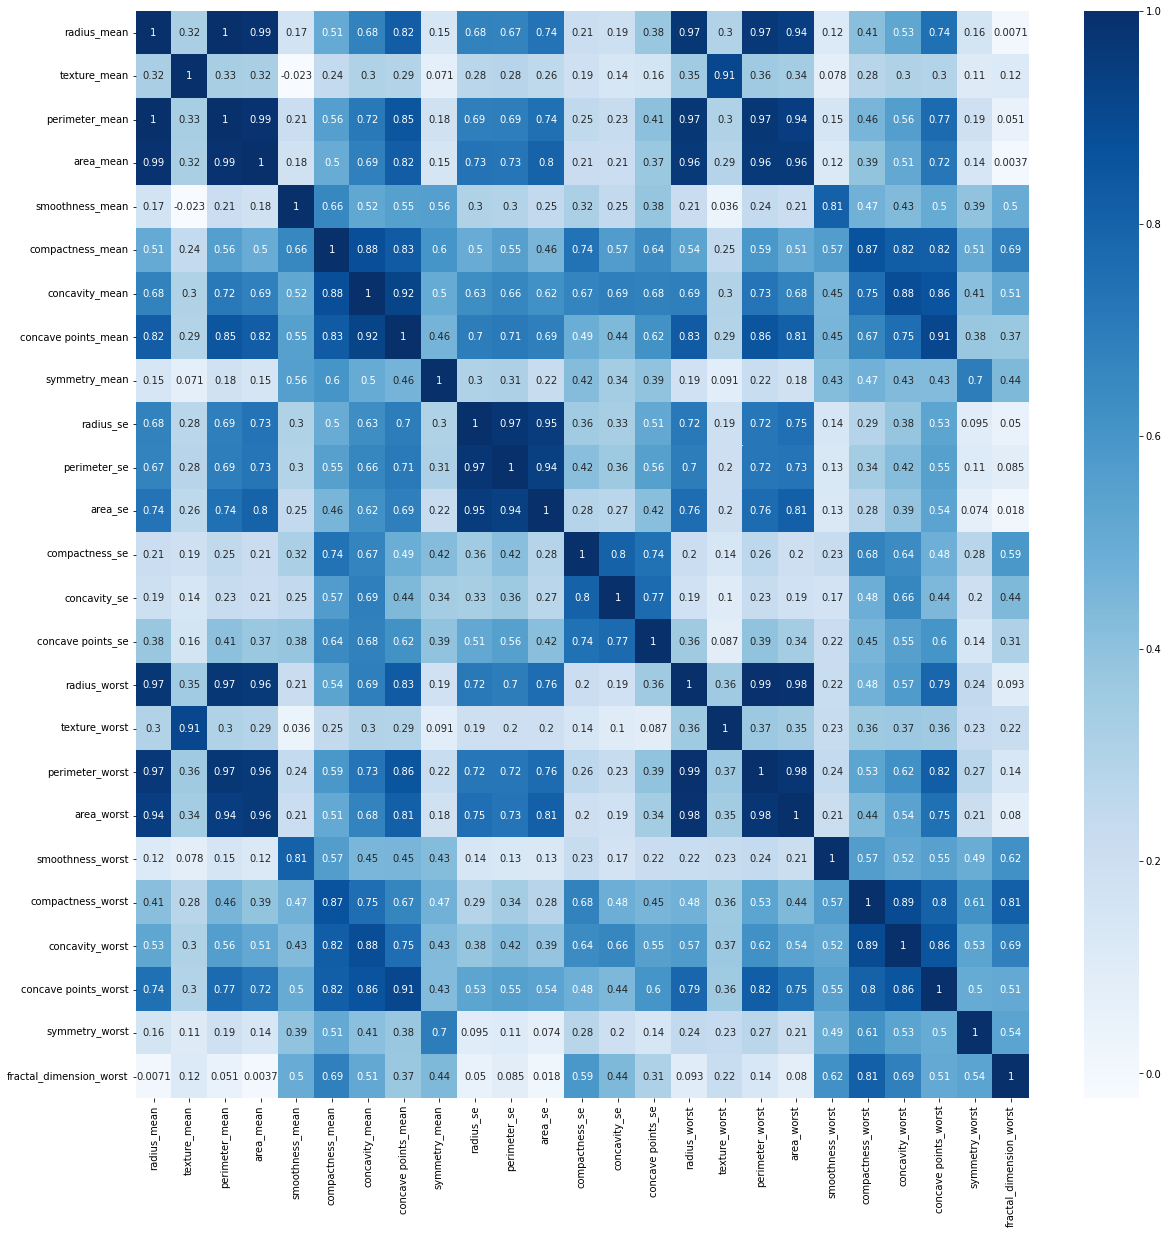

In [77]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that we previously determined
new_corr = df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

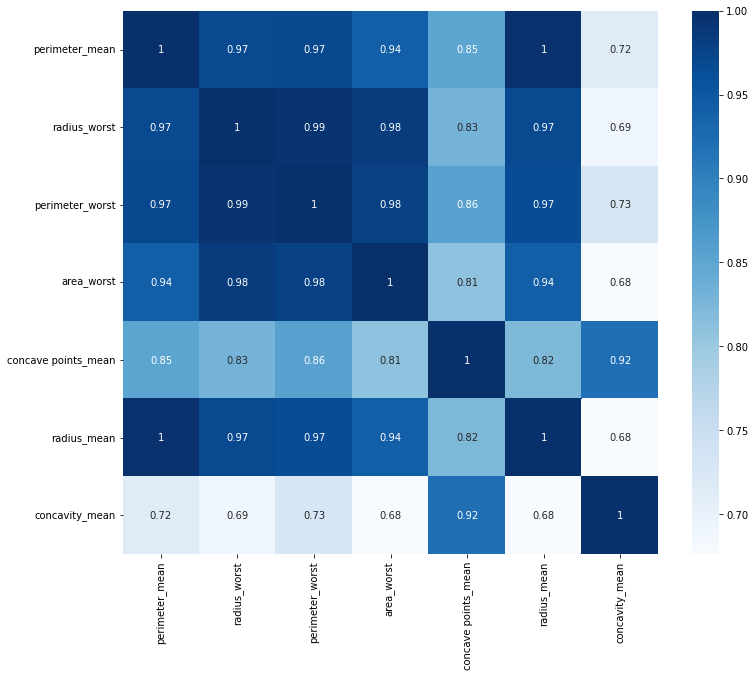

In [78]:
# Set figure size
plt.figure(figsize=(12,10))

# Select a subset of features
new_corr = df[['perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_mean', 'radius_mean', 'concavity_mean']].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

Now let's evaluate on the new filtered set of features.

In [79]:
# Remove the features with high correlation to other features
subset_feature_corr_names = [x for x in names if x not in ['perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavepoints_mean']]

# Calculate and check evaluation metrics
subset_feature_eval_df = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = results.append(subset_feature_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.97619,0.964706,25
Subset features,0.974206,0.973684,0.953488,0.97619,0.964706,21


## **Univariate selection with Scikit Learn**

In [83]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. We normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=20)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(df.drop("diagnosis",1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = df.drop("diagnosis",1 ).columns[feature_idx]
    
    return feature_names

In [84]:
univariate_feature_names = univariate_selection()

radius_mean: True
texture_mean: True
perimeter_mean: True
area_mean: True
smoothness_mean: False
compactness_mean: True
concavity_mean: True
concave points_mean: True
symmetry_mean: False
fractal_dimension_mean: False
radius_se: True
texture_se: False
perimeter_se: True
area_se: True
smoothness_se: False
compactness_se: False
concavity_se: False
concave points_se: True
symmetry_se: False
fractal_dimension_se: False
radius_worst: True
texture_worst: True
perimeter_worst: True
area_worst: True
smoothness_worst: True
compactness_worst: True
concavity_worst: True
concave points_worst: True
symmetry_worst: True
fractal_dimension_worst: False


In [85]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.97619,0.964706,25
Subset features,0.974206,0.973684,0.953488,0.97619,0.964706,21
F-test,0.974206,0.973684,0.953488,0.97619,0.964706,20


## **Wrapper Methods**

### Recursive Feature Elimination
We will use a RandomForestClassifier for this.

In [87]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)
    
    # All features of dataset are float values. We normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, 20)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = df.drop("diagnosis",1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()

In [89]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.97619,0.964706,25
Subset features,0.974206,0.973684,0.953488,0.97619,0.964706,21
F-test,0.974206,0.973684,0.953488,0.97619,0.964706,20
RFE,0.967262,0.964912,0.931818,0.97619,0.953488,20


## **Embedded Methods**

### Feature Importances

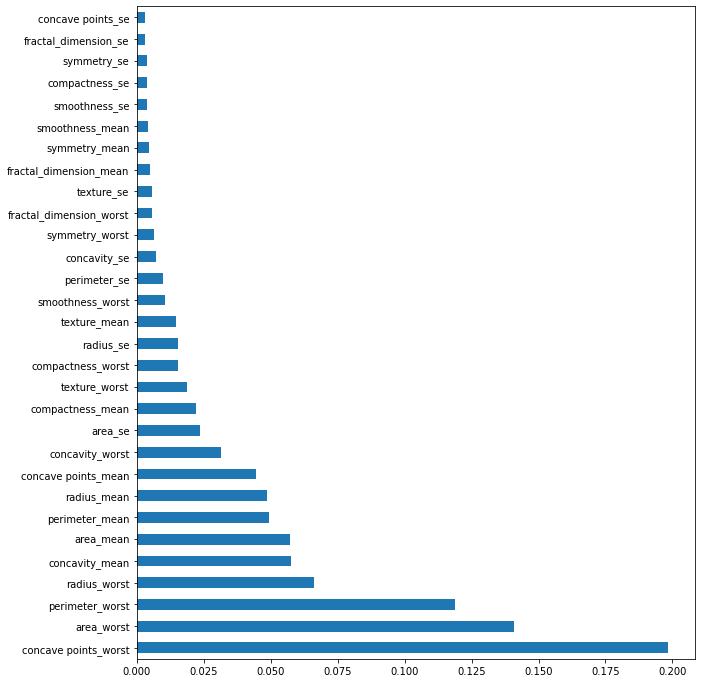

In [91]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)
   
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop("diagnosis",1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [92]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.97619,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.97619,0.964706,25
Subset features,0.974206,0.973684,0.953488,0.97619,0.964706,21
F-test,0.974206,0.973684,0.953488,0.97619,0.964706,20
RFE,0.967262,0.964912,0.931818,0.97619,0.953488,20
RFE,0.967262,0.964912,0.931818,0.97619,0.953488,20
Feature Importance,0.967262,0.964912,0.931818,0.97619,0.953488,16


### L1 Regularization
We often do regularization to reduce overfitting in models. Rather that doing regularization at layer levels, here we regularize the features. Yet, the essence of generalization is the same.

In [94]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = df.drop("diagnosis",1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()

In [95]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.967262,0.964912,0.931818,0.976190,0.953488,30
Strong features,0.974206,0.973684,0.953488,0.976190,0.964706,25
Subset features,0.974206,0.973684,0.953488,0.976190,0.964706,21
F-test,0.974206,0.973684,0.953488,0.976190,0.964706,20
RFE,0.967262,0.964912,0.931818,0.976190,0.953488,20
RFE,0.967262,0.964912,0.931818,0.976190,0.953488,20
Feature Importance,0.967262,0.964912,0.931818,0.976190,0.953488,16
L1 Reg,0.929563,0.929825,0.886364,0.928571,0.906977,18
